## Question

Tracking data(open data)로 나와있는 metrica의 klopy를 import하고 match_id 2번속에 들어있는 데이터(Frame)의 개수와 Timestamp의 길이가 얼마나 되는지 출력하라

## Solution

In [49]:
from kloppy import metrica
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import os
from tqdm import tqdm

In [50]:
dataset = metrica.load_open_data(match_id=2)


In [51]:
len(dataset.records)


141156

In [52]:
dataset.records[-1].timestamp


2928.56

## Question

위에서 Metrica데이터는 records형태로도, frame형태로도 사용할 수 있다. 동일하게 frame개수도 한번 확인하고 match_ id 2번 경기의 경기 중 frame60 ~ frame200까지의 볼(ball)움직임을 좌표로 찾아서 시각화까지 실행하라.

## Solution

In [53]:
len(dataset.frames)


141156

In [66]:
for frame in dataset.frames[60:200]:
    print(frame.ball_coordinates)

Point(x=0.4761, y=0.49502)
Point(x=0.4734, y=0.49489000000000005)
Point(x=0.4707, y=0.49477000000000004)
Point(x=0.468, y=0.49463999999999997)
Point(x=0.46529, y=0.49451)
Point(x=0.46259, y=0.49439)
Point(x=0.45989, y=0.49426000000000003)
Point(x=0.45719, y=0.49412999999999996)
Point(x=0.45449, y=0.49400999999999995)
Point(x=0.45179, y=0.49388)
Point(x=0.44909, y=0.49375)
Point(x=0.44639, y=0.49363)
Point(x=0.44369, y=0.49350000000000005)
Point(x=0.44099, y=0.49337)
Point(x=0.43829, y=0.49324999999999997)
Point(x=0.43559, y=0.49312)
Point(x=0.43289, y=0.49299000000000004)
Point(x=0.43018, y=0.49287000000000003)
Point(x=0.42748, y=0.49273999999999996)
Point(x=0.42478, y=0.49261)
Point(x=0.42208, y=0.49249)
Point(x=0.41938, y=0.49236)
Point(x=0.41668, y=0.49224)
Point(x=0.41398, y=0.49211000000000005)
Point(x=0.41128, y=0.49198)
Point(x=0.40858, y=0.49185999999999996)
Point(x=0.40588, y=0.49173)
Point(x=0.40419, y=0.49165000000000003)
Point(x=0.40435, y=0.49161999999999995)
Point(x=0.404

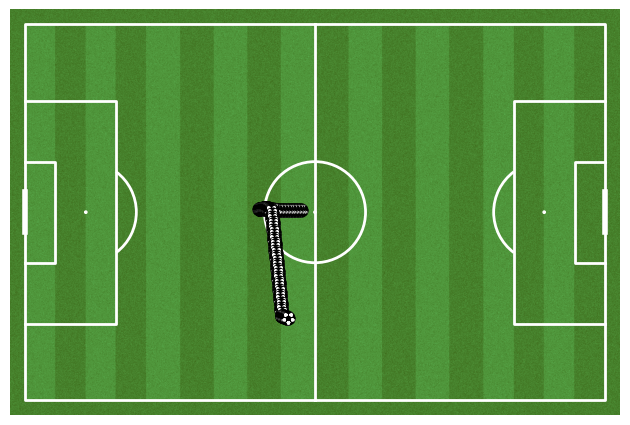

In [103]:
pitch = Pitch(
    pitch_type="metricasports",
    pitch_width=68, pitch_length=105,
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

for frame in dataset.frames[60:200]:

    pitch.scatter(
        frame.ball_coordinates.x,
        frame.ball_coordinates.y,
        marker="football", s=100,
        zorder=999,
        ax=ax
    )


plt.show()


## Question

이 Tracking data를 가지고 임의로 골대 방향으로 향한 슈팅의 숫자를 알아보고 싶다. 골대 방향이라 하면 골대의 2기둥 안쪽의 방향으로 향하는 공을 뜻하고 그 위로 높낮이는 골이 되지 않더라도 괜찮다. metrica sports type의 골대 기준에서 이 슈팅의 기준을 y좌표를 0.45보다 크거나 같고 0.55보다는 작거나 같다고 가정했을 때(x좌표는 잘 생각해보라) 각각의 frame번호와 슈팅 개수를 구하라.

단, 이전 프레임과 연속된 값이 나올시에는 하나의 프레임만 선택한다.

## Solution

In [112]:
goal_frames = []

for frame_number in range(0, 141156):  
    frame = dataset.frames[frame_number]
    
    if frame.ball_coordinates is not None:
        ball_x = frame.ball_coordinates.x
        ball_y = frame.ball_coordinates.y


        # 슈팅의 범위
        if (ball_x <= 0.000000 or ball_x >= 1.0000) and (ball_y >= 0.45 or ball_y < 0.55):
            goal_frames.append(frame_number)


# 연속된 숫자 
filtered_goal_frames = []
for i, frame_number in enumerate(goal_frames):
    if i == 0 or frame_number != goal_frames[i - 1] + 1:  # 이전 프레임과 연속되지 않은 경우
        filtered_goal_frames.append(frame_number)

print("골이 발생한 프레임 번호 (연속된 숫자 제외):", filtered_goal_frames)
print("골이 발생한 프레임 수:", len(filtered_goal_frames))


골이 발생한 프레임 번호 (연속된 숫자 제외): [4440, 7166, 9945, 12210, 18538, 19484, 26529, 27358, 27993, 33906, 43489, 52012, 53072, 56123, 57408, 63370, 67102, 69922, 71966, 73993, 75842, 81264, 86216, 90200, 96971, 97808, 98949, 115022, 117242, 121053, 124309, 124358, 132592, 136071]
골이 발생한 프레임 수: 34


## Question

Frame 60~120 사이의 모든 선수들의 좌표를 찍고 시각화 하라.

## Solution

In [71]:
for frame in dataset.frames[60:120]:
    for player, coord in frame.players_coordinates.items():
        if player.team.name == "Home":
            print(player.player_id, coord)

home_11 Point(x=0.94678, y=0.50891)
home_1 Point(x=0.6489, y=0.73244)
home_2 Point(x=0.67748, y=0.57394)
home_3 Point(x=0.67728, y=0.45511999999999997)
home_4 Point(x=0.64328, y=0.22350000000000003)
home_5 Point(x=0.57148, y=0.74666)
home_6 Point(x=0.60539, y=0.52659)
home_7 Point(x=0.58308, y=0.44276000000000004)
home_8 Point(x=0.53365, y=0.21350999999999998)
home_9 Point(x=0.49978, y=0.64918)
home_10 Point(x=0.49846, y=0.35019)
home_11 Point(x=0.94667, y=0.50881)
home_1 Point(x=0.64901, y=0.7326900000000001)
home_2 Point(x=0.67743, y=0.57394)
home_3 Point(x=0.67685, y=0.45519)
home_4 Point(x=0.64316, y=0.22294999999999998)
home_5 Point(x=0.5713, y=0.74663)
home_6 Point(x=0.60546, y=0.5266500000000001)
home_7 Point(x=0.58302, y=0.44289)
home_8 Point(x=0.53367, y=0.21352000000000004)
home_9 Point(x=0.49955, y=0.6491899999999999)
home_10 Point(x=0.49813, y=0.35067000000000004)
home_11 Point(x=0.94656, y=0.50871)
home_1 Point(x=0.64911, y=0.73278)
home_2 Point(x=0.67737, y=0.57394)
home_

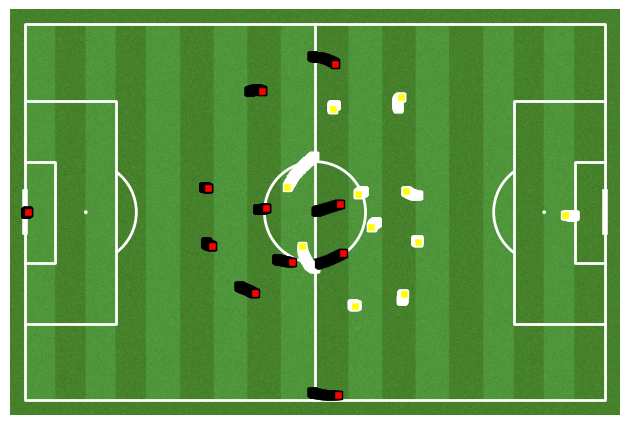

In [111]:
pitch = Pitch(
    pitch_type="metricasports",
    pitch_width=68, pitch_length=105,
    pitch_color="grass",
    line_color="white",
    stripe=True
)



fig, ax = pitch.draw()



for frame in dataset.frames[60:120]:
    for player, coord in frame.players_coordinates.items():
        if player.team.name == "Home":
            pitch.plot(coord.x, coord.y, marker="s", color="yellow", markeredgecolor="white", zorder=1, ax=ax)
        else:
            pitch.plot(coord.x, coord.y, marker="s", color="red", markeredgecolor="black", zorder=1, ax=ax)

plt.show()